In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training6.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
0,0.283796,0.588021,0.290969,0.282278,0.784029,0.784029,0.784029,0.0,0.784029,0.0,...,0.0,0.0,0.0,0.0,0.138435,0.774979,0.841925,0.729303,0.035697,208500
1,0.092527,0.596101,0.365551,0.329517,0.794802,0.794802,0.794802,0.0,0.397401,0.0,...,0.0,0.0,0.0,0.0,0.366577,0.781355,0.853494,0.739325,0.224365,181500
2,0.276849,0.575928,0.293967,0.377339,0.767904,0.000000,0.767904,0.0,0.767904,0.0,...,0.0,0.0,0.0,0.0,0.645407,0.749653,0.824610,0.714304,0.048948,223500
3,0.325659,0.577848,0.260568,0.317907,0.770464,0.000000,0.770464,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.134972,0.757275,0.827359,0.000000,0.638451,140000
4,0.247985,0.518287,0.326673,0.434552,0.691049,0.000000,0.691049,0.0,0.345525,0.0,...,0.0,0.0,0.0,0.0,0.775564,0.664857,0.742080,0.642814,0.050342,250000


In [3]:
corr=df.corr()

In [4]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
SalePrice,-0.149958,-0.395050,0.113581,0.317537,-0.488240,-0.317057,-0.200098,-0.014314,-0.165933,0.005742,...,0.042390,0.090962,0.085395,-0.026840,-0.098794,-0.573913,-0.307684,-0.001034,-0.571548,1.000000
GrLivArea,0.109397,-0.208915,0.099421,-0.015611,-0.224525,-0.168171,-0.128206,-0.020050,-0.100007,-0.048385,...,0.007700,0.052381,0.053335,-0.037432,-0.011940,-0.271855,-0.175348,-0.041676,-0.228113,0.589120
GarageArea,-0.102609,-0.272965,0.163152,0.069512,-0.206190,-0.167510,-0.007230,0.000376,-0.087617,-0.063508,...,0.027967,0.018784,-0.006017,-0.042975,-0.030864,-0.209394,-0.180956,0.078789,-0.504633,0.505566
GarageCars,-0.025598,-0.226690,0.131242,0.014013,-0.165928,-0.177420,-0.005890,0.001519,-0.085281,-0.069889,...,0.027165,0.015425,-0.017865,-0.060124,-0.016287,-0.172838,-0.147486,0.097013,-0.558473,0.504552
TotalBsmtSF,-0.254642,-0.150886,0.175788,0.059492,-0.126953,-0.170931,0.001812,-0.022100,-0.037908,-0.047332,...,0.030134,0.062056,0.009560,-0.043781,-0.016115,-0.159271,-0.161371,0.024657,-0.400962,0.500621
OverallQual,0.158913,-0.069057,0.056226,-0.338996,0.145592,-0.086879,0.110167,-0.016284,0.046199,-0.166283,...,0.006592,0.005374,-0.027426,-0.061161,0.091586,0.161213,0.009252,0.185739,-0.498392,0.488216
1stFlrSF,-0.244680,-0.102913,0.205277,0.009925,-0.105627,-0.135931,-0.032153,0.002520,-0.040561,-0.039258,...,0.042364,0.054946,0.018800,-0.055110,0.003352,-0.132602,-0.181235,-0.006951,-0.282207,0.436239
MasVnrArea,0.024757,-0.156048,0.043841,0.025674,-0.192391,-0.113695,-0.023828,0.060766,-0.054439,-0.049446,...,0.018037,0.053694,-0.018137,-0.033129,-0.054778,-0.213859,-0.144448,-0.013854,-0.322663,0.426354
Fireplaces,-0.061848,-0.126831,0.074122,0.179437,-0.233658,-0.209772,-0.134864,0.013120,-0.094607,0.033067,...,0.008254,0.169294,0.050150,-0.006998,-0.028060,-0.284568,-0.110770,-0.000086,-0.176910,0.399534
FullBath,0.166597,-0.228867,0.023200,-0.132801,-0.062543,-0.136374,0.037362,-0.034132,0.003399,-0.118610,...,0.025886,-0.061983,-0.011930,-0.036091,0.019664,-0.081209,-0.083164,0.089712,-0.480101,0.395909


In [5]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [6]:
model=SVR()

In [7]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [8]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'GrLivArea', 'GarageArea', 'GarageCars', 'TotalBsmtSF',
       'OverallQual', '1stFlrSF', 'MasVnrArea', 'Fireplaces', 'FullBath'],
      dtype='object')

In [9]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,59478.712173,88596.212986,-0.023332
1,11,59492.101466,88607.727968,-0.023598
2,12,59494.003600,88606.676499,-0.023574
3,13,59494.936259,88608.855688,-0.023624
4,14,59496.154296,88610.291997,-0.023657
...,...,...,...,...
105,115,59526.844449,88628.186276,-0.024071
106,116,59526.844449,88628.186276,-0.024071
107,117,59526.844449,88628.186276,-0.024071
108,118,59526.844449,88628.186276,-0.024071


In [10]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
0,10,59478.712173,88596.212986,-0.023332
1,11,59492.101466,88607.727968,-0.023598
2,12,59494.003600,88606.676499,-0.023574
3,13,59494.936259,88608.855688,-0.023624
5,15,59495.807882,88610.652602,-0.023665
...,...,...,...,...
42,52,59546.302653,88648.725841,-0.024545
43,53,59546.656259,88648.830360,-0.024548
44,54,59546.688297,88648.842401,-0.024548
45,55,59546.813525,88648.866573,-0.024549


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_25676\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_25676\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


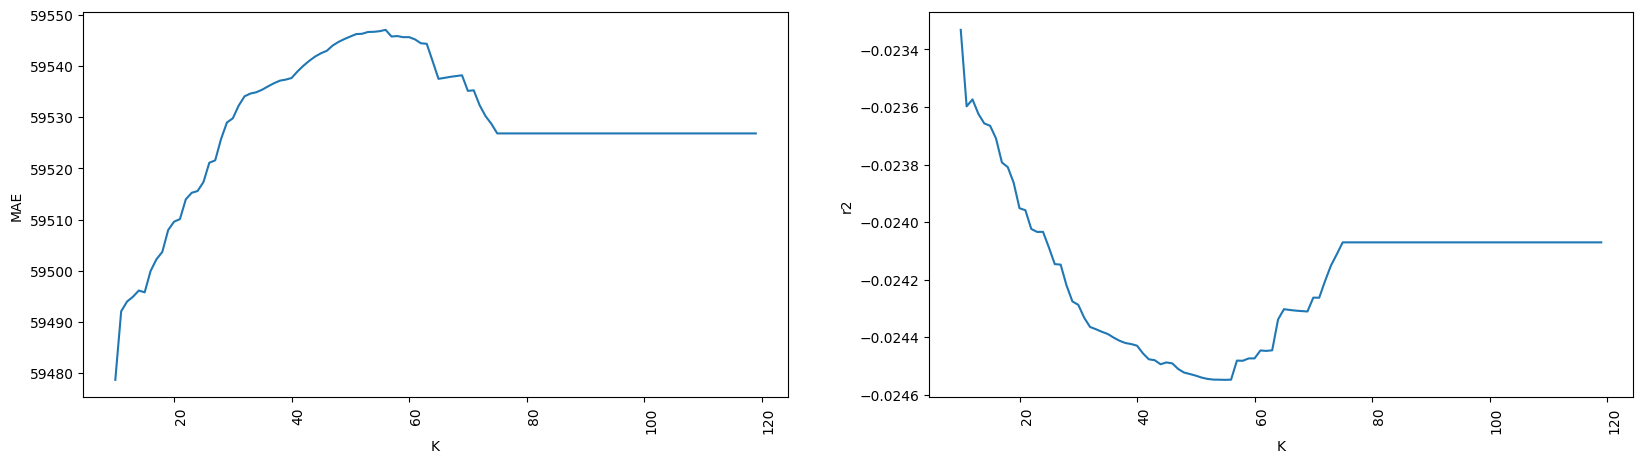

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [12]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass       4.398967e-02
MSZoning         2.081592e-02
LotFrontage      7.395555e-03
LotArea          1.775773e-02
Street           8.537823e-03
                     ...     
YrSold           8.563767e-03
SaleType         3.334230e-02
SaleCondition    4.257620e-02
Ageofhouse       4.753259e-02
SalePrice        6.306789e+09
Length: 75, dtype: float64

In [13]:
varr.loc[varr > 0.1].index

Index(['LotShape', 'LotConfig', 'HeatingQC', 'SalePrice'], dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['LotShape', 'LotConfig', 'HeatingQC', 'SalePrice'], dtype='object')

In [16]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,59526.516154,88627.940925,-0.024065
1,101,59526.516154,88627.940925,-0.024065
2,102,59526.180409,88627.694098,-0.024059
3,103,59526.180409,88627.694098,-0.024059
4,104,59526.180409,88627.694098,-0.024059
...,...,...,...,...
395,495,59525.058910,88626.757538,-0.024038
396,496,59525.058910,88626.757538,-0.024038
397,497,59525.058910,88626.757538,-0.024038
398,498,59525.058910,88626.757538,-0.024038


In [17]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
399,499,59525.058910,88626.757538,-0.024038
374,474,59525.058910,88626.757538,-0.024038
375,475,59525.058910,88626.757538,-0.024038
376,476,59525.058910,88626.757538,-0.024038
377,477,59525.058910,88626.757538,-0.024038
...,...,...,...,...
47,147,59526.180409,88627.694098,-0.024059
48,148,59526.180409,88627.694098,-0.024059
42,142,59526.180409,88627.694098,-0.024059
1,101,59526.516154,88627.940925,-0.024065


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_25676\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_25676\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


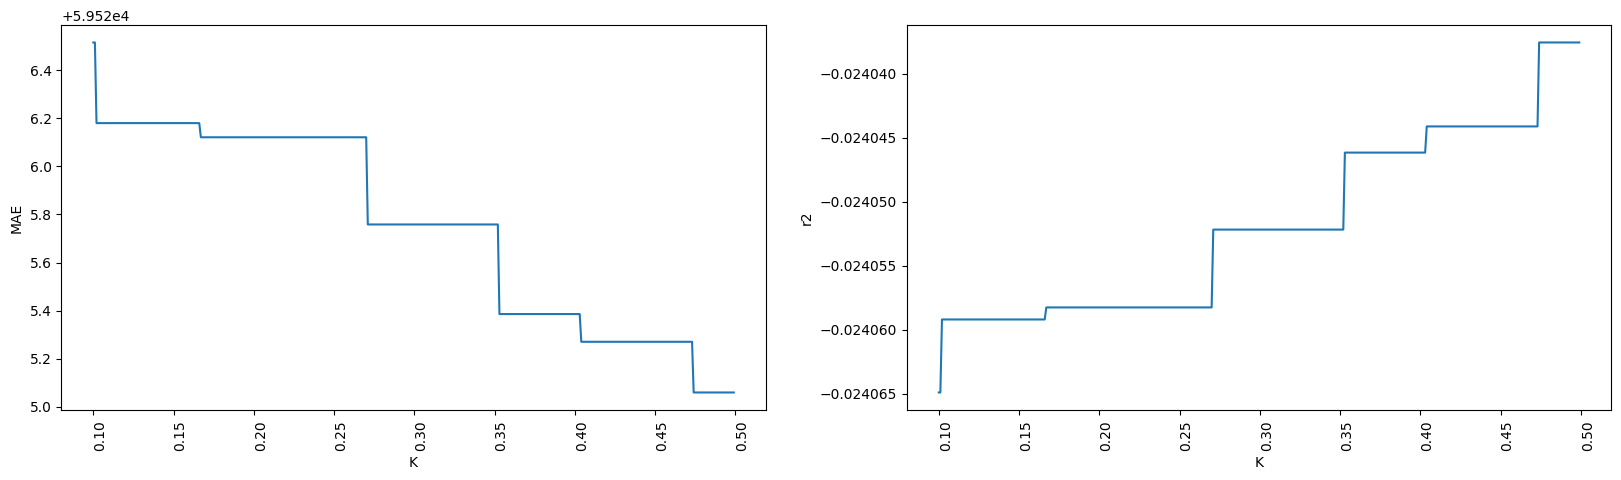

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


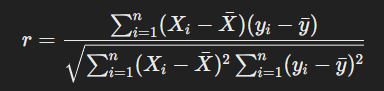

### Using numpy

In [19]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [20]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.4882156521131217


In [21]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

[]

### Using sklearn

In [22]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'], dtype=object)

In [23]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,59482.250230,88597.895354,-0.023371
1,6,59486.649225,88602.702384,-0.023482
2,7,59488.821657,88602.969762,-0.023488
3,8,59490.221596,88601.977712,-0.023465
4,9,59478.712173,88596.212986,-0.023332
...,...,...,...,...
110,115,59526.844449,88628.186276,-0.024071
111,116,59526.844449,88628.186276,-0.024071
112,117,59526.844449,88628.186276,-0.024071
113,118,59526.844449,88628.186276,-0.024071


In [24]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
4,9,59478.712173,88596.212986,-0.023332
0,5,59482.250230,88597.895354,-0.023371
1,6,59486.649225,88602.702384,-0.023482
2,7,59488.821657,88602.969762,-0.023488
3,8,59490.221596,88601.977712,-0.023465
...,...,...,...,...
46,51,59546.302653,88648.725841,-0.024545
47,52,59546.656259,88648.830360,-0.024548
48,53,59546.688297,88648.842401,-0.024548
49,54,59546.813525,88648.866573,-0.024549


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_25676\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_25676\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


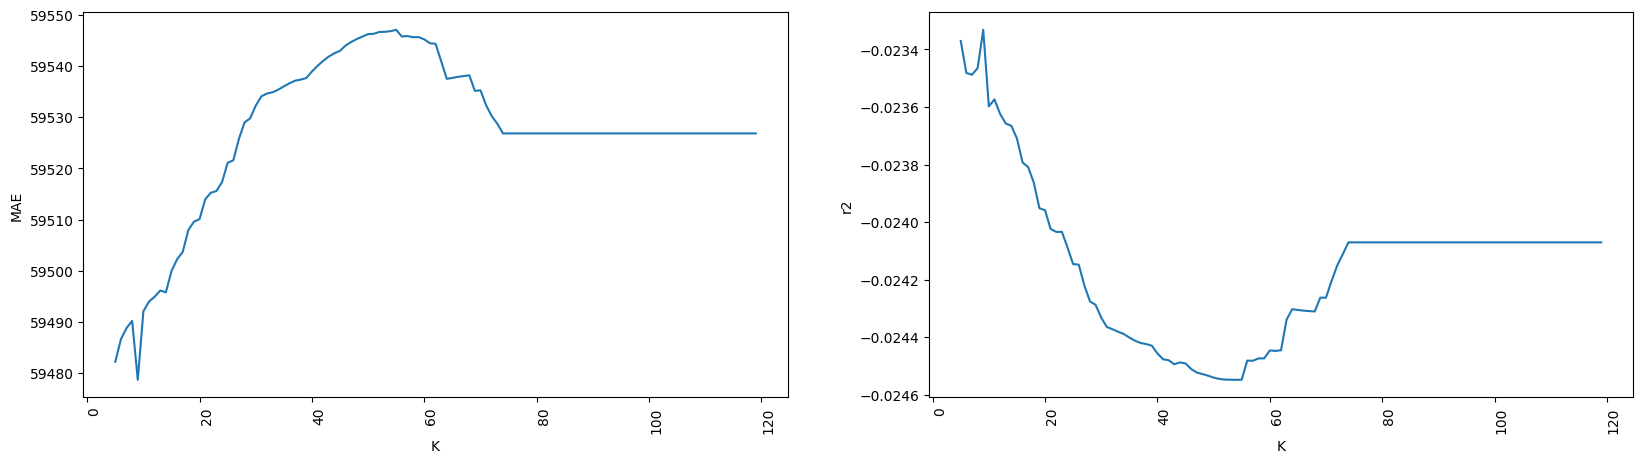

In [25]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

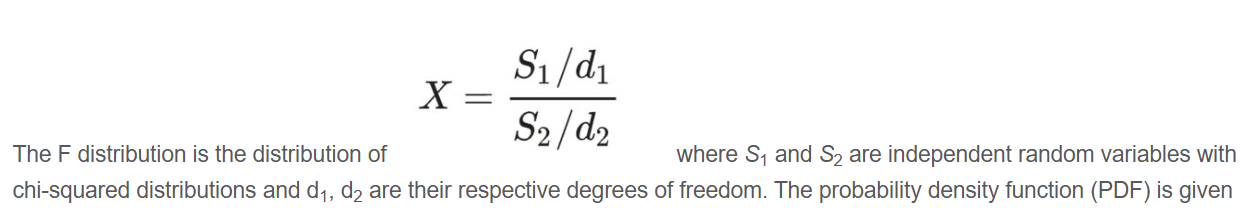

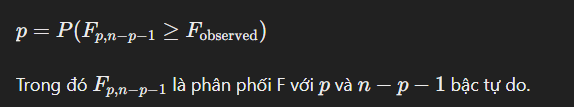

In [26]:
from sklearn.feature_selection import f_regression

In [27]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,59435.488791,88566.774571,-0.022652
1,6,59439.124620,88565.944161,-0.022633
2,7,59433.391174,88563.091304,-0.022567
3,8,59436.077543,88564.167893,-0.022592
4,9,59438.157127,88565.470038,-0.022622
...,...,...,...,...
110,115,59526.844449,88628.186276,-0.024071
111,116,59526.844449,88628.186276,-0.024071
112,117,59526.844449,88628.186276,-0.024071
113,118,59526.844449,88628.186276,-0.024071


In [28]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
2,7,59433.391174,88563.091304,-0.022567
0,5,59435.488791,88566.774571,-0.022652
3,8,59436.077543,88564.167893,-0.022592
4,9,59438.157127,88565.470038,-0.022622
1,6,59439.124620,88565.944161,-0.022633
...,...,...,...,...
113,118,59526.844449,88628.186276,-0.024071
87,92,59526.844449,88628.186276,-0.024071
88,93,59526.844449,88628.186276,-0.024071
79,84,59526.844449,88628.186276,-0.024071


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_25676\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_25676\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


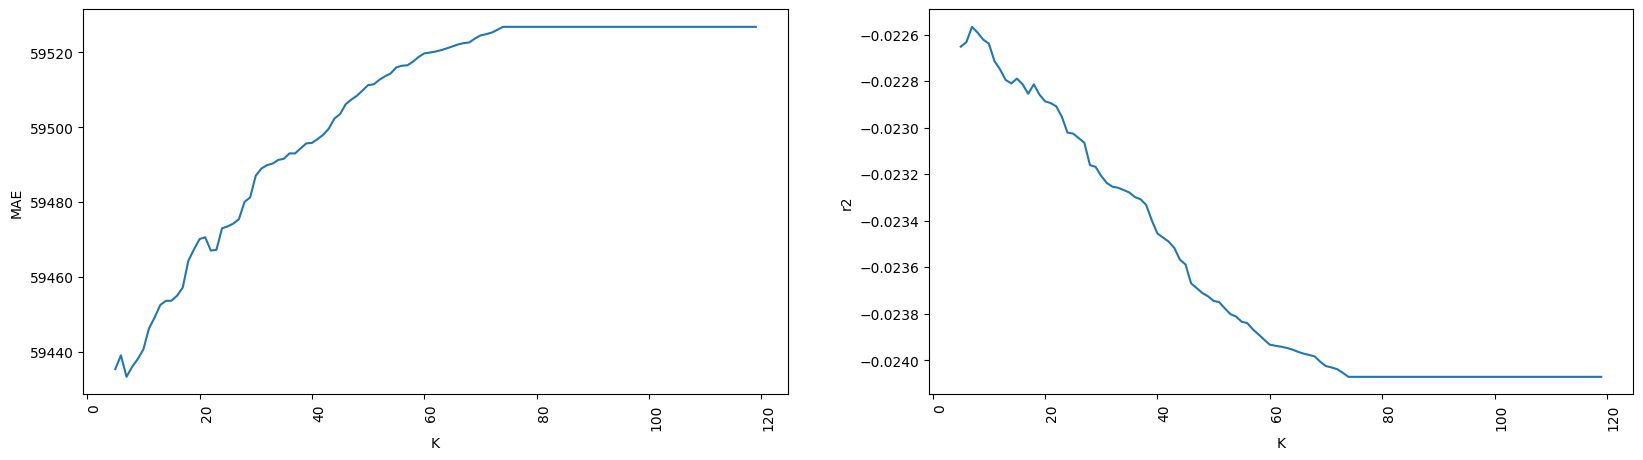

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

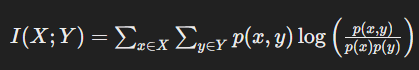

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

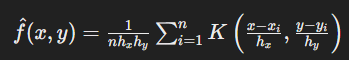

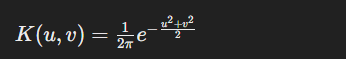

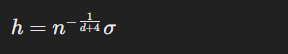

In [30]:
all_col=df.columns
all_col

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [31]:
from sklearn.feature_selection import mutual_info_regression

In [32]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,59450.038744,88581.589639,-0.022994
1,6,59446.900854,88574.962842,-0.022841
2,7,59442.045331,88574.443929,-0.022829
3,8,59467.076271,88591.711082,-0.023228
4,9,59468.363927,88593.965253,-0.023280
...,...,...,...,...
110,115,59526.844449,88628.186276,-0.024071
111,116,59526.844449,88628.186276,-0.024071
112,117,59526.844449,88628.186276,-0.024071
113,118,59526.844449,88628.186276,-0.024071


In [33]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [34]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
2,7,59442.045331,88574.443929,-0.022829
1,6,59446.900854,88574.962842,-0.022841
0,5,59450.038744,88581.589639,-0.022994
3,8,59467.076271,88591.711082,-0.023228
4,9,59468.363927,88593.965253,-0.023280
...,...,...,...,...
113,118,59526.844449,88628.186276,-0.024071
87,92,59526.844449,88628.186276,-0.024071
88,93,59526.844449,88628.186276,-0.024071
79,84,59526.844449,88628.186276,-0.024071


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_25676\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_25676\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


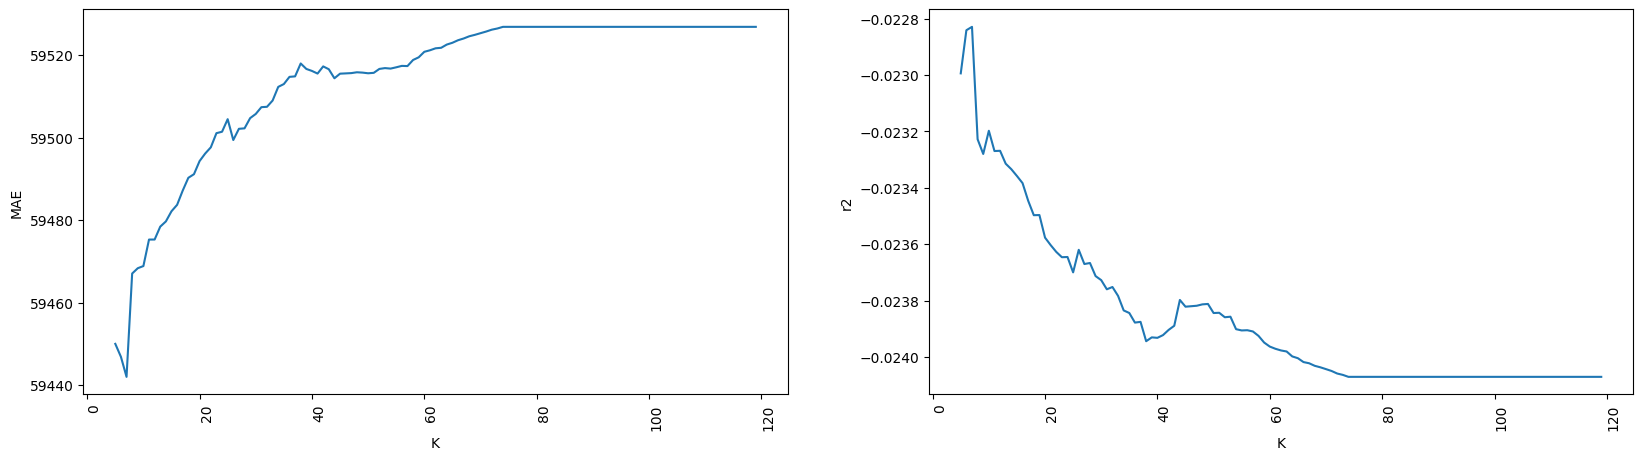

In [35]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [36]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,59495.845222,88608.456637,-0.023615
1,6,59498.153736,88612.535023,-0.023709
2,7,59505.235511,88614.688620,-0.023759
3,8,59506.338781,88613.407861,-0.023729
4,9,59478.549379,88599.895614,-0.023417
...,...,...,...,...
110,115,59525.030147,88633.651139,-0.024197
111,116,59525.061249,88633.671629,-0.024197
112,117,59525.091858,88633.691818,-0.024198
113,118,59525.121985,88633.711712,-0.024198


In [37]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,59391.310406,88502.976632,-0.021179
1,6,59392.614453,88502.867573,-0.021177
2,7,59416.413519,88543.177952,-0.022107
3,8,59428.324670,88550.242866,-0.022270
4,9,59435.796289,88553.982360,-0.022356
...,...,...,...,...
110,115,59518.893512,88626.183071,-0.024024
111,116,59519.279226,88626.564031,-0.024033
112,117,59519.333202,88626.610799,-0.024034
113,118,59519.481876,88626.735725,-0.024037


In [38]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,59450.038744,88581.589639,-0.022994
1,6,59446.900854,88574.962842,-0.022841
2,7,59442.045331,88574.443929,-0.022829
3,8,59467.076271,88591.711082,-0.023228
4,9,59468.363927,88593.965253,-0.023280
...,...,...,...,...
110,115,59526.844449,88628.186276,-0.024071
111,116,59526.844449,88628.186276,-0.024071
112,117,59526.844449,88628.186276,-0.024071
113,118,59526.844449,88628.186276,-0.024071


In [39]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,59495.845222,88608.456637,-0.023615,59391.310406,88502.976632,-0.021179
1,6,59498.153736,88612.535023,-0.023709,59392.614453,88502.867573,-0.021177
2,7,59505.235511,88614.688620,-0.023759,59416.413519,88543.177952,-0.022107
3,8,59506.338781,88613.407861,-0.023729,59428.324670,88550.242866,-0.022270
4,9,59478.549379,88599.895614,-0.023417,59435.796289,88553.982360,-0.022356
...,...,...,...,...,...,...,...
110,115,59525.030147,88633.651139,-0.024197,59518.893512,88626.183071,-0.024024
111,116,59525.061249,88633.671629,-0.024197,59519.279226,88626.564031,-0.024033
112,117,59525.091858,88633.691818,-0.024198,59519.333202,88626.610799,-0.024034
113,118,59525.121985,88633.711712,-0.024198,59519.481876,88626.735725,-0.024037


In [40]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,59495.845222,88608.456637,-0.023615,59391.310406,88502.976632,-0.021179,59450.038744,88581.589639,-0.022994
1,6,59498.153736,88612.535023,-0.023709,59392.614453,88502.867573,-0.021177,59446.900854,88574.962842,-0.022841
2,7,59505.235511,88614.688620,-0.023759,59416.413519,88543.177952,-0.022107,59442.045331,88574.443929,-0.022829
3,8,59506.338781,88613.407861,-0.023729,59428.324670,88550.242866,-0.022270,59467.076271,88591.711082,-0.023228
4,9,59478.549379,88599.895614,-0.023417,59435.796289,88553.982360,-0.022356,59468.363927,88593.965253,-0.023280
...,...,...,...,...,...,...,...,...,...,...
110,115,59525.030147,88633.651139,-0.024197,59518.893512,88626.183071,-0.024024,59526.844449,88628.186276,-0.024071
111,116,59525.061249,88633.671629,-0.024197,59519.279226,88626.564031,-0.024033,59526.844449,88628.186276,-0.024071
112,117,59525.091858,88633.691818,-0.024198,59519.333202,88626.610799,-0.024034,59526.844449,88628.186276,-0.024071
113,118,59525.121985,88633.711712,-0.024198,59519.481876,88626.735725,-0.024037,59526.844449,88628.186276,-0.024071


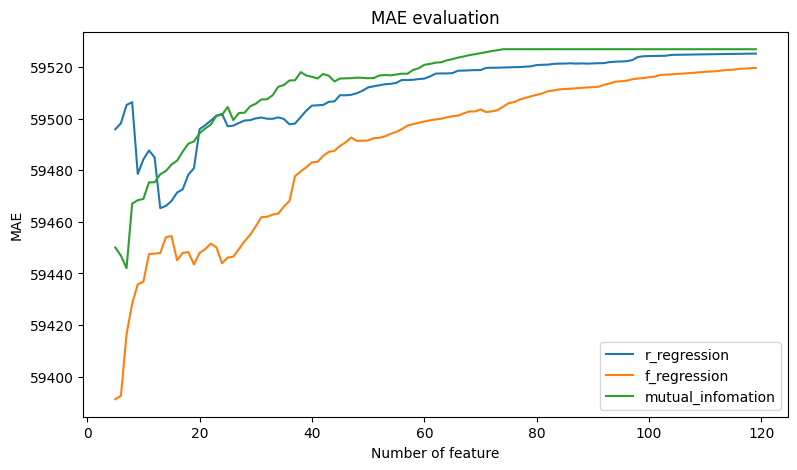

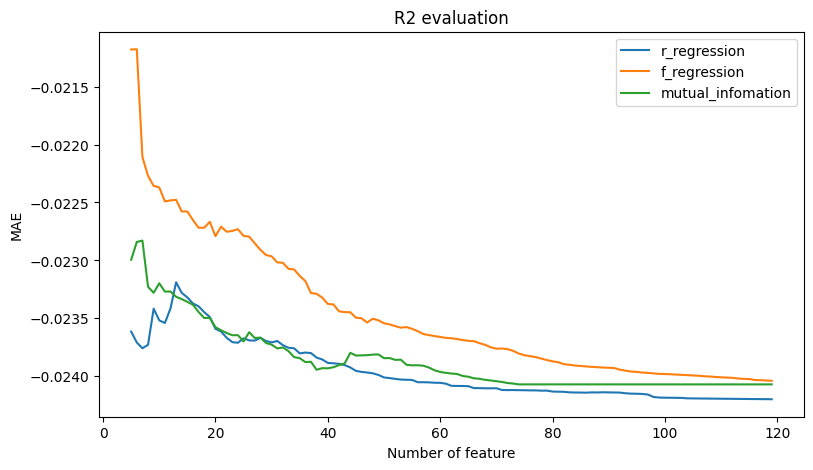

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()